In [1]:
import pandas as pd
import csv
import os

myListDir=os.listdir()
folder=input("The name of your input folder without extension: ")
while not folder+".0" in myListDir: #extension 0 certainly exists, as we have at least one rank
    print(folder+": wrong name")
    folder=input("The name of your input folder, without extension: ")

os.chdir("./"+folder+".0") #extension 0 certainly exists, as we have at least one rank

with open("plotInfo.csv","r") as data:
    reader = csv.reader(data, delimiter = ',')
    for row in reader:
        fileNameRoot=row[0] #the names of the files contating the data start with...
        rankNum=int(row[1]) #we have file from different ranks, reported in different folders with name, for a specific
                            #rank: fileNameRoot+"."+str(rank)
        #ag0num=int(row[2])  #how many agents in each rank, with type==0

#current folders
print("Current folders are:")
for k in range(rankNum):
    print(folder+"."+str(k))

The name of your input folder without extension: prova
Current folders are:
prova.0


In [2]:
#display all the rows of the dataframe  
pd.set_option('display.max_rows', None)

In [3]:
names=["_total_production_","_total_cost_of_production_","_total_cost_of_unused_factors_",
        "_total_inv_goods_revenues_", "_total_cons_goods_revenues_",
       "_total_inv_goods_inventories_","_total_in_progress_inv_goods_inventories_",
       "_total_cons_goods_inventories_","_total_in_progress_cons_goods_inventories_", "_total_lost_production_",
       "_total_cost_of_lost_production_","_updatedLabor_","_updatedCapital_", "total_capQ_dynamic_"]

In [4]:
# series database
series={}
for name in names:
    k=0
    #which folder
    os.chdir("../"+folder+"."+str(k))
    #create the dataframe with the content of the folder with extension 0 (k value here)
    #for the 'name' series
    series[name]=pd.read_csv(fileNameRoot+name+str(k)+".csv", header=None)

    for k in range(1,rankNum):   #add the same series from the other folders
        #which folder
        os.chdir("../"+folder+"."+str(k))
        series[name]=series[name].add(pd.read_csv(fileNameRoot+name+str(k)+".csv", header=None))

'_total_production_'

,0,1,2,3,4
0,42.958621,61.036412,36.803369,39.874429,6.505627
1,89.766346,108.278927,94.538373,76.583089,2.966691
2,116.750034,160.923085,117.303424,29.092354,3.323749
3,140.589760,206.549918,134.346510,38.652231,5.287278
4,177.799590,227.859772,155.972719,30.032486,4.931300
5,200.398141,234.777466,178.782557,44.999777,9.116461
6,211.468467,232.223664,183.952755,57.244096,6.837790
7,217.175400,231.791086,186.234131,236.238146,13.249031
8,216.620578,234.565403,179.402453,242.789734,3.648836
9,210.908602,227.021587,195.458259,267.479182,13.864112


'____________________________________________________________'

'_total_cost_of_production_'

,0,1,2,3,4
0,155.833333,209.805556,128.888889,104.069444,24.694444
1,325.833333,371.583333,324.444444,201.083333,12.347222
2,425.000000,551.055556,404.444444,77.611111,14.111111
3,521.333333,707.777778,462.222222,100.541667,17.638889
4,663.000000,778.555556,537.777778,81.138889,17.638889
5,748.000000,803.833333,606.666667,119.944444,33.513889
6,790.500000,796.250000,626.666667,153.458333,24.694444
7,813.166667,798.777778,633.333333,613.833333,44.097222
8,816.000000,813.944444,613.333333,619.125000,14.111111
9,793.333333,783.611111,673.333333,687.916667,45.861111


'____________________________________________________________'

'_total_cost_of_unused_factors_'

,0,1,2,3,4
0,801.463522,745.927395,911.584172,1734.809403,161.465118
1,631.463522,584.149617,716.028617,1637.795515,173.812340
2,532.296856,404.677395,636.028617,1761.267737,172.048451
3,435.963522,247.955173,578.250839,1738.337181,168.520673
4,294.296856,177.177395,502.695283,1757.739959,168.520673
5,209.296856,151.899617,433.806394,1718.934403,152.645673
6,166.796856,159.482951,413.806394,2119.420515,169.465118
7,144.130189,156.955173,407.139728,1987.043613,159.820325
8,141.296856,141.788506,427.139728,2355.842596,207.086521
9,163.963522,172.121839,367.139728,2838.844538,209.842338


'____________________________________________________________'

'_total_inv_goods_revenues_'

,0,1,2,3,4
0,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0
4,646.986243,0.0,0.0,0.0,0.0
5,435.415100,0.0,0.0,0.0,0.0
6,663.321007,0.0,0.0,0.0,0.0
7,939.618310,0.0,0.0,0.0,0.0
8,1580.792508,0.0,0.0,0.0,0.0
9,889.158436,0.0,0.0,0.0,0.0


'____________________________________________________________'

'_total_cons_goods_revenues_'

,0,1,2,3,4
0,0.0,0.000000,0.000000,144.945554,31.480534
1,0.0,0.000000,0.000000,320.189902,18.876117
2,0.0,0.000000,518.893707,206.116626,26.298922
3,0.0,0.000000,395.448924,172.542639,32.683553
4,0.0,390.361693,920.384187,191.121069,29.443808
5,0.0,1242.098451,918.880026,239.992697,44.956792
6,0.0,1318.987867,975.520087,228.662610,37.323131
7,0.0,803.284637,1156.180065,1017.455942,66.142756
8,0.0,1592.622113,1292.775307,1124.432145,33.871509
9,0.0,1630.180989,1074.418721,1426.490002,67.657252


'____________________________________________________________'

'_total_inv_goods_inventories_'

,0,1,2,3,4
0,0.000000,0,0,0,0
1,0.000000,0,0,0,0
2,0.000000,0,0,0,0
3,0.000000,0,0,0,0
4,552.500000,0,0,0,0
5,397.425838,0,0,0,0
6,482.849104,0,0,0,0
7,943.051766,0,0,0,0
8,1377.439560,0,0,0,0
9,765.577888,0,0,0,0


'____________________________________________________________'

'_total_in_progress_inv_goods_inventories_'

,0,1,2,3,4
0,202.583333,0,0,0,0
1,626.166667,0,0,0,0
2,1178.666667,0,0,0,0
3,1856.400000,0,0,0,0
4,2165.800000,0,0,0,0
5,2861.950000,0,0,0,0
6,3513.900000,0,0,0,0
7,3668.600000,0,0,0,0
8,3668.600000,0,0,0,0
9,4257.933333,0,0,0,0


'____________________________________________________________'

'_total_cons_goods_inventories_'

,0,1,2,3,4
0,0,0.000000,0.000000,135.290278,27.163889
1,0,0.000000,0.000000,300.068242,19.758810
2,0,0.000000,509.333333,187.502752,22.696955
3,0,0.000000,398.070862,180.795834,24.567118
4,0,377.902778,838.438246,171.247963,22.180860
5,0,1182.361649,808.848788,199.761695,39.416933
6,0,1113.387682,918.928770,239.262397,36.609627
7,0,697.404104,1052.582046,884.803990,60.234485
8,0,1413.889346,1108.462003,1011.362529,31.661536
9,0,1472.705160,1001.278465,1156.032765,59.527753


'____________________________________________________________'

'_total_in_progress_cons_goods_inventories_'

,0,1,2,3,4
0,0,272.747222,154.666667,0.0,0.0
1,0,755.805556,544.000000,0.0,0.0
2,0,1472.177778,520.000000,0.0,0.0
3,0,2392.288889,840.000000,0.0,0.0
4,0,3026.508333,781.333333,0.0,0.0
5,0,3006.791667,925.333333,0.0,0.0
6,0,3282.825000,954.666667,0.0,0.0
7,0,3857.894444,930.666667,0.0,0.0
8,0,3664.013889,840.000000,0.0,0.0
9,0,3562.144444,893.333333,0.0,0.0


'____________________________________________________________'

'_total_lost_production_'

,0,1,2,3,4
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,0,0,0
6,0,0,0,0,0
7,0,0,0,0,0
8,0,0,0,0,0
9,0,0,0,0,0


'____________________________________________________________'

'_total_cost_of_lost_production_'

,0,1,2,3,4
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,0,0,0
6,0,0,0,0,0
7,0,0,0,0,0
8,0,0,0,0,0
9,0,0,0,0,0


'____________________________________________________________'

'_updatedLabor_'

,0,1,2,3,4
0,364.0,371.0,506.0,835.0,102.0
1,364.0,371.0,506.0,835.0,102.0
2,364.0,371.0,506.0,835.0,102.0
3,364.0,371.0,506.0,835.0,102.0
4,364.0,371.0,506.0,835.0,102.0
5,364.0,371.0,506.0,1269.0,110.0
6,364.0,371.0,506.0,1397.0,111.0
7,364.0,371.0,506.0,1669.0,127.0
8,364.0,371.0,506.0,1995.0,145.0
9,364.0,371.0,506.0,2241.0,152.0


'____________________________________________________________'

'_updatedCapital_'

,0,1,2,3,4
0,38833.975999,38273.429493,34983.691269,65708.433677,5508.625884
1,38833.975999,38273.429493,34983.691269,65708.433677,5508.625884
2,38833.975999,38273.429493,34983.691269,65708.433677,5508.625884
3,38833.975999,38273.429493,34983.691269,65708.433677,5508.625884
4,38833.975999,38273.429493,34983.691269,65708.433677,5508.625884
5,38833.975999,38273.429493,34983.691269,65708.433677,5508.625884
6,38833.975999,38273.429493,34983.691269,78799.218287,6081.875806
7,38833.975999,38273.429493,34983.691269,85481.515407,6165.663208
8,38833.975999,38273.429493,34983.691269,100260.733393,7246.043935
9,38833.975999,38273.429493,34983.691269,114332.307208,8109.306332


'____________________________________________________________'

'total_capQ_dynamic_'

,0,1,2,3,4
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,382.448334,16.808256
7,0.000000,0.000000,0.000000,200.850066,2.817511
8,0.000000,0.000000,0.000000,438.441884,31.778925
9,0.000000,0.000000,0.000000,423.144605,26.026746


'____________________________________________________________'

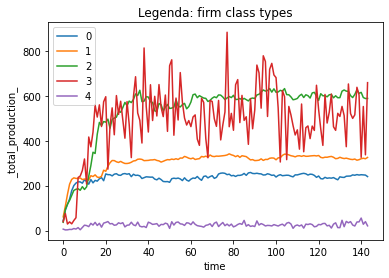

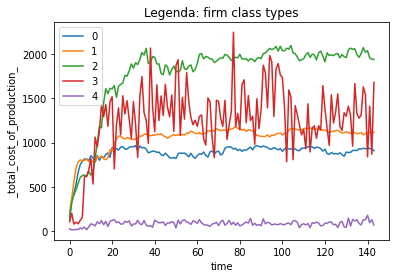

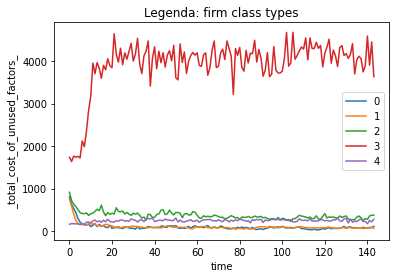

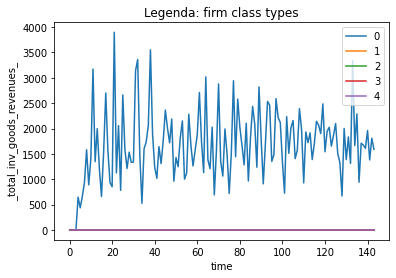

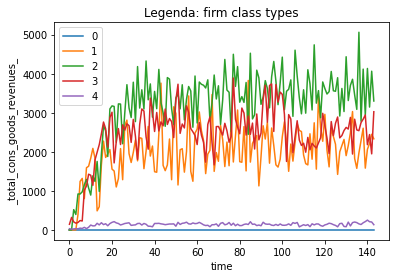

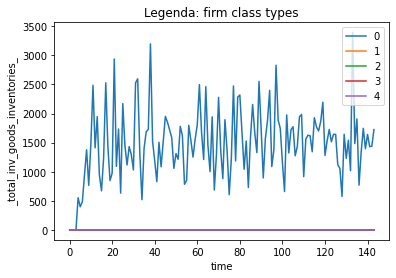

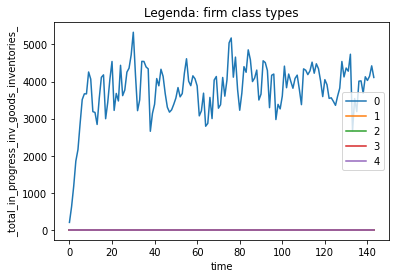

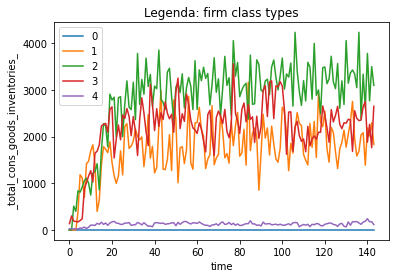

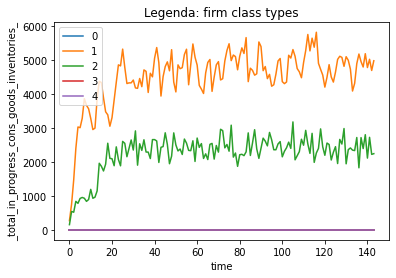

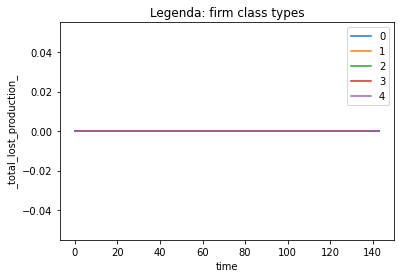

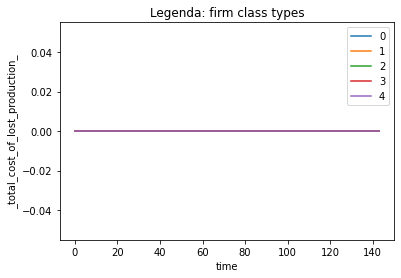

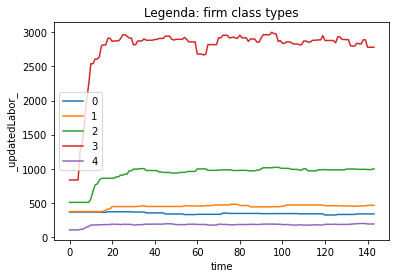

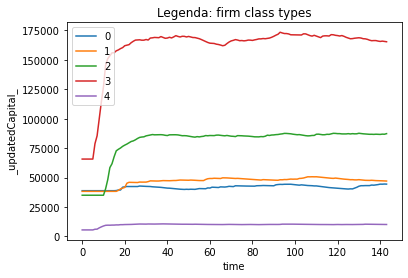

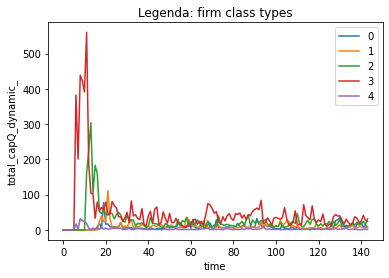

In [5]:
for name in names:
    display(name)
    display(series[name])
    display("____________________________________________________________")
    series[name].plot(title="Legenda: firm class types",xlabel="time",ylabel=name)